In [12]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta, datetime

import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

# 1st Scenario

In [14]:
# given mean trip duration
mean_trip = 100
# assumed standard deviation
std_trip = 20
# number of trips
n_trip = 10000
# % RPC lost
shrinkage_rate = 0.1 
# replication
np.random.seed(42)

In [15]:
# simulate a trip duration with normal distribution
sim = np.random.normal(mean_trip, std_trip, n_trip)

(array([  1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   3.,   3.,   0.,
          4.,   7.,  11.,   4.,   8.,  10.,  10.,  14.,  20.,  11.,  28.,
         34.,  42.,  45.,  49.,  59.,  76.,  60.,  81., 110., 103., 144.,
        120., 146., 159., 175., 204., 199., 245., 233., 235., 276., 277.,
        273., 298., 303., 315., 285., 336., 311., 301., 317., 299., 296.,
        292., 276., 260., 266., 226., 212., 181., 190., 188., 160., 162.,
        125., 126., 106.,  93.,  99.,  83.,  60.,  50.,  47.,  39.,  47.,
         34.,  19.,  20.,  16.,  15.,  15.,  10.,   7.,   8.,   2.,   6.,
          2.,   7.,   3.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          2.]),
 array([ 21.55199497,  23.12172256,  24.69145015,  26.26117774,
         27.83090533,  29.40063293,  30.97036052,  32.54008811,
         34.1098157 ,  35.67954329,  37.24927088,  38.81899848,
         40.38872607,  41.95845366,  43.52818125,  45.09790884,
         46.66763643,  48.23736403,  49.80709162,  51.37681921

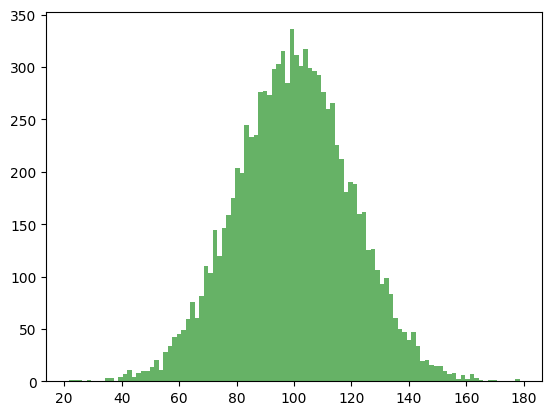

In [16]:
plt.hist(sim, bins=100, alpha=0.6, color='g')

(array([  1.,   1.,   2.,   0.,   2.,   3.,   0.,   3.,   1.,   0.,   5.,
          7.,  11.,   0.,  16.,  24.,   0.,  26.,  25.,   0.,  39.,  50.,
         67.,   0.,  86.,  79.,   0., 131., 136.,   0., 135., 165., 205.,
          0., 232., 243.,   0., 282., 293.,   0., 309., 329., 379.,   0.,
        360., 387.,   0., 373., 405.,   0., 474., 395., 403.,   0., 382.,
        378.,   0., 356., 313.,   0., 326., 276., 258.,   0., 204., 215.,
          0., 180., 162.,   0., 148., 118.,  97.,   0., 108.,  62.,   0.,
         73.,  50.,   0.,  35.,  38.,  38.,   0.,  25.,  17.,   0.,  12.,
         11.,   0.,   6.,   9.,   3.,   0.,   4.,   6.,   0.,   4.,   1.,
          1.]),
 array([ 65. ,  65.7,  66.4,  67.1,  67.8,  68.5,  69.2,  69.9,  70.6,
         71.3,  72. ,  72.7,  73.4,  74.1,  74.8,  75.5,  76.2,  76.9,
         77.6,  78.3,  79. ,  79.7,  80.4,  81.1,  81.8,  82.5,  83.2,
         83.9,  84.6,  85.3,  86. ,  86.7,  87.4,  88.1,  88.8,  89.5,
         90.2,  90.9,  91.6,  92.3

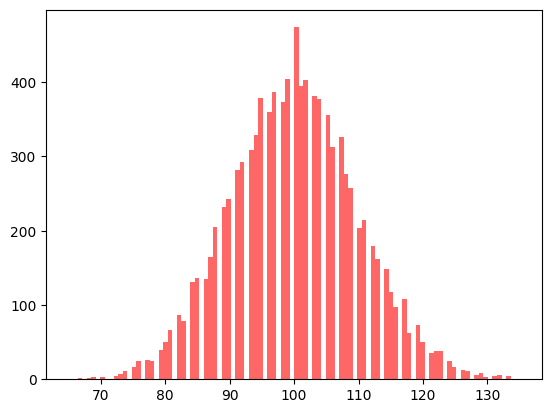

In [17]:
# simulating a trip duration with poisson distribution
sim_p = np.random.poisson(100,10000)

plt.hist(sim_p, bins=100, alpha=0.6, color='r')

In [18]:
# see the min and max values of the two distributions
print(sim.min(),
sim.max())
print(sim_p.min(),
sim_p.max())

21.55199496763315 178.52475412872653
65 135


In [19]:
# Generate rental dates
np.random.seed(42)
start_date = datetime(2020, 1, 1)
rental_dates = [start_date + timedelta(days=np.random.randint(0, 365 * 3)) for _ in range(n_trip)]


In [20]:
print(start_date)
print(rental_dates[:10])


2020-01-01 00:00:00
[datetime.datetime(2022, 5, 10, 0, 0), datetime.datetime(2022, 11, 10, 0, 0), datetime.datetime(2020, 5, 1, 0, 0), datetime.datetime(2021, 4, 11, 0, 0), datetime.datetime(2020, 11, 26, 0, 0), datetime.datetime(2020, 3, 28, 0, 0), datetime.datetime(2022, 5, 21, 0, 0), datetime.datetime(2020, 5, 10, 0, 0), datetime.datetime(2022, 2, 8, 0, 0), datetime.datetime(2020, 12, 9, 0, 0)]


In [21]:
# randomly create a list with the lost assets
is_lost = np.random.rand(n_trip) < shrinkage_rate
return_dates = [
    rental_dates[i] + timedelta(days=int(sim_p[i])) if not is_lost[i] else None
    for i in range(n_trip)
]

In [22]:
# Create a DataFrame
data = pd.DataFrame({
    "rental_date": rental_dates,
    "return_date": return_dates,
    "is_lost": is_lost
})

data['n_days'] = (data['return_date'] - data['rental_date']).dt.days
data['sim_p'] = sim_p

data.head()

,rental_date,return_date,is_lost,n_days,sim_p
0,2022-05-10,NaT,True,NaN,95
1,2022-11-10,NaT,True,NaN,82
2,2020-05-01,2020-08-11,False,102.0,102
3,2021-04-11,2021-07-15,False,95.0,95
4,2020-11-26,NaT,True,NaN,94


In [23]:
data.loc[data.is_lost == True]

,rental_date,return_date,is_lost,n_days,sim_p
0,2022-05-10,NaT,True,NaN,95
1,2022-11-10,NaT,True,NaN,82
4,2020-11-26,NaT,True,NaN,94
20,2022-12-18,NaT,True,NaN,88
43,2022-08-13,NaT,True,NaN,88
...,...,...,...,...,...
9964,2022-07-11,NaT,True,NaN,116
9965,2022-07-23,NaT,True,NaN,114
9972,2022-12-25,NaT,True,NaN,116
9975,2020-04-15,NaT,True,NaN,94


In [24]:
sum(data['is_lost']==False) 

9002

## Shrinkage estimator

In [25]:
from lifelines import KaplanMeierFitter

In [26]:
# Prepare survival data
data['trip_completed'] = data['return_date'].notnull()  # 1 if returned, 0 if lost
data['trip_duration'] = (data['return_date'] - data['rental_date']).dt.days
data['trip_duration'].fillna(data['trip_duration'].max(), inplace=True)  # Handle NaN for lost RPCs

(array([  12.,  105.,  534., 1380., 2254., 2458., 1480.,  587.,  160.,
        1030.]),
 array([ 65.,  72.,  79.,  86.,  93., 100., 107., 114., 121., 128., 135.]),
 <BarContainer object of 10 artists>)

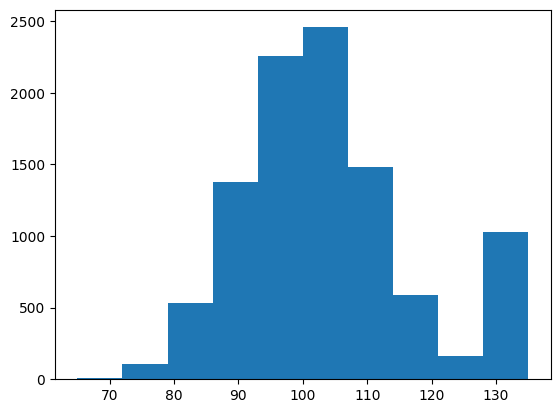

In [27]:
plt.hist(data['trip_duration'])

In [28]:
# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(data['trip_duration'], event_observed=data['trip_completed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10000 total observations, 998 right-censored observations>

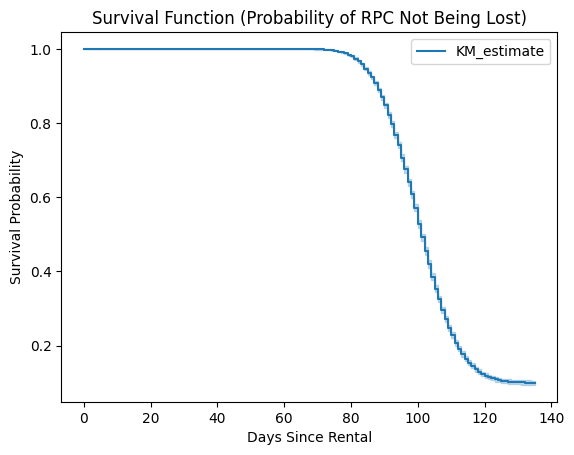

In [29]:
# Plot survival curve
kmf.plot_survival_function()
# kmf.survival_function_
plt.title('Survival Function (Probability of RPC Not Being Lost)')
plt.xlabel('Days Since Rental')
plt.ylabel('Survival Probability')
plt.show()

In [37]:
kmf.median_survival_time_

print(kmf.survival_function_[0:90])

          KM_estimate
timeline             
0.0            1.0000
65.0           0.9999
66.0           0.9998
67.0           0.9996
68.0           0.9995
69.0           0.9992
70.0           0.9989
71.0           0.9988
72.0           0.9984
73.0           0.9978
74.0           0.9967
75.0           0.9952
76.0           0.9929
77.0           0.9907
78.0           0.9883
79.0           0.9847
80.0           0.9802
81.0           0.9741
82.0           0.9662
83.0           0.9588
84.0           0.9468
85.0           0.9349
86.0           0.9232
87.0           0.9078
88.0           0.8895
89.0           0.8693
90.0           0.8476


In [31]:
# Shrinkage rate at day n
DAY = 100 # change this value to see the shrinkage rate at different days
day_n_survival = kmf.survival_function_at_times(DAY).values[0]
day_n_survival
shrinkage_rate_at_n = 1 - day_n_survival
print(f"Shrinkage rate at day {DAY}: {shrinkage_rate_at_n:.4f}")


Shrinkage rate at day 100: 0.4722


## Pool size

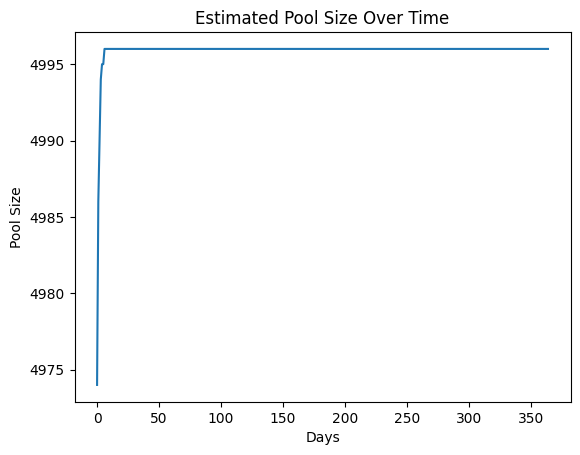

In [32]:
# Parameters for simulation
initial_pool_size = 5000  # Starting number of RPCs
rental_rate = 50  # Number of RPCs rented out each day
days_to_simulate = 365  # Number of days to simulate (1 year)

# Simulate assets rented out and returned over time
available_assets = initial_pool_size
assets_out = 0
assets_returned = 0
shrinkage_rate = 0.1  # Shrinkage rate: 10% of assets don't return

# Create a list to store the pool size over time
pool_sizes = []

for day in range(days_to_simulate):
    # Simulate number of assets rented out (could be a random number or fixed rate)
    rented_today = rental_rate
    assets_out += rented_today
    
    # Simulate the number of assets returning (based on survival probabilities)
    # Let's assume average trip duration is 100 days, using the Kaplan-Meier survival function.
    # For simplicity, we'll assume all assets rented 100 days ago have returned.
    return_probability = kmf.survival_function_at_times(100).values[0]  # Survival at 100 days
    returned_today = int(assets_out * return_probability)
    
    # Simulate shrinkage (number of assets that don't return)
    lost_today = int(assets_out * (1 - return_probability) * shrinkage_rate)
    
    # Update the pool size
    available_assets = initial_pool_size + returned_today - rented_today - lost_today
    pool_sizes.append(available_assets)
    
    # Update the number of assets out (subtract the ones that have returned)
    assets_out -= returned_today

# Plot the pool size over time
plt.plot(pool_sizes)
plt.title("Estimated Pool Size Over Time")
plt.xlabel("Days")
plt.ylabel("Pool Size")
plt.show()


In [33]:
# stable pool size after 5 days
pool_sizes[0:10]

[4974, 4986, 4990, 4994, 4995, 4995, 4996, 4996, 4996, 4996]